In [47]:
import csv
import geopandas
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from descartes import PolygonPatch

In [48]:
df= pd.read_csv('listings.csv')
df1=pd.read_csv('listings2.csv')
pd.set_option('display.max_columns', None)
df1.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20220108124849,2022-01-09,Beautiful Room & House,"<b>The space</b><br />House: Clean, New, Moder...",Very safe! Family oriented. Older age group.,https://a0.muscache.com/pictures/44620/5a5815c...,33057,https://www.airbnb.com/users/show/33057,Manju,2009-08-21,AU,About us: We are an East Indian couple in our ...,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",f,f,"Bulleen, Victoria, Australia",Manningham,NaN,-37.77268,145.09213,Private room in residential home,Private room,2,NaN,1 bath,1.0,2.0,"[""Wifi"", ""Long term stays allowed""]",$60.00,1,365,1,1,365,365,1.0,365.0,NaN,t,30,60,90,365,2022-01-09,4,0,0,2011-05-24,2015-09-12,4.50,4.33,5.00,5.00,4.75,4.50,4.67,NaN,f,1,0,1,0,0.03
1,12936,https://www.airbnb.com/rooms/12936,20220108124849,2022-01-08,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,https://www.airbnb.com/users/show/50121,The A2C Team,2009-10-31,"Melbourne, Victoria, Australia",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/3894a...,https://a0.muscache.com/im/pictures/user/3894a...,St Kilda,13.0,13.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"St Kilda, Victoria, Australia",Port Phillip,NaN,-37.85999,144.97662,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Wifi"", ""TV"", ""Kitchen...",$95.00,3,14,3,3,14,14,3.0,14.0,NaN,t,0,0,0,0,2022-01-08,42,0,0,2010-08-04,2020-03-15,4.68,4.78,4.71,4.83,4.83,4.78,4.66,NaN,f,10,10,0,0,0.30
2,33111,https://www.airbnb.com/rooms/33111,20220108124849,2022-01-08,Million Dollar Views Over Melbourne,<b>The space</b><br /><b>Enjoy Million Dollar ...,NaN,https://a0.muscache.com/pictures/187260/0888dd...,143550,https://www.airbnb.com/users/show/143550,Paul,2010-06-13,"Melbourne, Victoria, Australia",Professional couple who enjoy entertaining in ...,within an hour,88%,96%,f,https://a0.muscache.com/im/users/143550/profil...,https://a0.muscache.com/im/users/143550/profil...,Southbank,1.0,1.0,"['email', 'phone', 'reviews']",t,t,NaN,Melbourne,NaN,-37.81997,144.96834,Private room in rental unit,Private room,2,NaN,2.5 baths,1.0,1.0,"[""Hot tub"", ""Washer"", ""Wifi"", ""Free parking on...","$1,000.00",1,730,1,1,730,730,1.0,730.0,NaN,t,0,0,0,265,2022-01-08,2,0,0,2011-10-16,2012-01-27,4.50,4.00,4.50,4.00,4.00,5.00,4.00,NaN,f,1,0,1,0,0.02
3,38271,https://www.airbnb.com/rooms/38271,20220108124849,2022-01-09,Melbourne - Old Trafford Apartment,After hosting ma

In [49]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77268,145.09213,Private room,60,1,4,2015-09-12,0.03,1,365,0,NaN
1,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.85999,144.97662,Entire home/apt,95,3,42,2020-03-15,0.30,10,0,0,NaN
2,33111,Million Dollar Views Over Melbourne,143550,Paul,NaN,Melbourne,-37.81997,144.96834,Private room,1000,1,2,2012-01-27,0.02,1,265,0,NaN
3,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.05725,145.33936,Entire home/apt,110,1,171,2021-12-16,1.26,1,313,18,NaN
4,41836,CLOSE TO CITY & MELBOURNE AIRPORT,182833,Diana,NaN,Darebin,-37.69729,145.00082,Private room,40,7,159,2018-08-22,1.17,2,0,0,NaN


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17409 entries, 0 to 17408
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17409 non-null  int64  
 1   listing_url                                   17409 non-null  object 
 2   scrape_id                                     17409 non-null  int64  
 3   last_scraped                                  17409 non-null  object 
 4   name                                          17407 non-null  object 
 5   description                                   16818 non-null  object 
 6   neighborhood_overview                         10805 non-null  object 
 7   picture_url                                   17409 non-null  object 
 8   host_id                                       17409 non-null  int64  
 9   host_url                                      17409 non-null 

In [51]:
df1.isnull().sum().sort_values(ascending=False)

bathrooms                       17409
license                         17409
neighbourhood_group_cleansed    17409
calendar_updated                17409
host_neighbourhood               8466
                                ...  
longitude                           0
latitude                            0
calendar_last_scraped               0
neighbourhood_cleansed              0
id                                  0
Length: 74, dtype: int64

In [52]:
df.describe(include = "all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.740900e+04,17407,1.740900e+04,17405,0.0,17409,17409.000000,17409.000000,17409,17409.000000,17409.000000,17409.000000,13484,13484.000000,17409.000000,17409.000000,17409.000000,0.0
unique,NaN,16926,NaN,4790,NaN,30,NaN,NaN,4,NaN,NaN,NaN,1965,NaN,NaN,NaN,NaN,NaN
top,NaN,Royal Stays|Near Casino|Wifi|Kitchen|Laundry|P...,NaN,Valeria,NaN,Melbourne,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-01-01,NaN,NaN,NaN,NaN,NaN
freq,NaN,23,NaN,152,NaN,5196,NaN,NaN,11370,NaN,NaN,NaN,362,NaN,NaN,NaN,NaN,NaN
mean,2.941236e+07,NaN,1.141079e+08,NaN,NaN,NaN,-37.827128,145.017436,NaN,190.626458,7.054110,26.948590,NaN,0.960199,8.383422,131.435637,4.845252,NaN
std,1.504325e+07,NaN,1.113817e+08,NaN,NaN,NaN,0.072614,0.147454,NaN,411.494624,35.167185,53.402014,NaN,1.328659,21.255568,142.236783,11.498529,NaN
min,9.835000e+03,NaN,9.082000e+03,NaN,NaN,NaN,-38.224110,144.518670,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.759309e+07,NaN,2.350156e+07,NaN,NaN,NaN,-37.855460,144.957770,NaN,75.000000,1.000000,1.000000,NaN,0.120000,1.000000,0.000000,0.000000,NaN
50%,2.978818e+07,NaN,7.072784e+07,NaN,NaN,NaN,-37.819230,144.979860,NaN,122.000000,2.000000,5.000000,NaN,0.500000,1.000000,78.000000,0.000000,NaN
75%,4.178045e+07,NaN,1.770456e+08,NaN,NaN,NaN,-37.800900,145.030750,NaN,200.000000,3.000000,28.000000,NaN,1.300000,4.000000,290.000000,4.000000,NaN


In [53]:
df.describe(include = "all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.740900e+04,17407,1.740900e+04,17405,0.0,17409,17409.000000,17409.000000,17409,17409.000000,17409.000000,17409.000000,13484,13484.000000,17409.000000,17409.000000,17409.000000,0.0
unique,NaN,16926,NaN,4790,NaN,30,NaN,NaN,4,NaN,NaN,NaN,1965,NaN,NaN,NaN,NaN,NaN
top,NaN,Royal Stays|Near Casino|Wifi|Kitchen|Laundry|P...,NaN,Valeria,NaN,Melbourne,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-01-01,NaN,NaN,NaN,NaN,NaN
freq,NaN,23,NaN,152,NaN,5196,NaN,NaN,11370,NaN,NaN,NaN,362,NaN,NaN,NaN,NaN,NaN
mean,2.941236e+07,NaN,1.141079e+08,NaN,NaN,NaN,-37.827128,145.017436,NaN,190.626458,7.054110,26.948590,NaN,0.960199,8.383422,131.435637,4.845252,NaN
std,1.504325e+07,NaN,1.113817e+08,NaN,NaN,NaN,0.072614,0.147454,NaN,411.494624,35.167185,53.402014,NaN,1.328659,21.255568,142.236783,11.498529,NaN
min,9.835000e+03,NaN,9.082000e+03,NaN,NaN,NaN,-38.224110,144.518670,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.759309e+07,NaN,2.350156e+07,NaN,NaN,NaN,-37.855460,144.957770,NaN,75.000000,1.000000,1.000000,NaN,0.120000,1.000000,0.000000,0.000000,NaN
50%,2.978818e+07,NaN,7.072784e+07,NaN,NaN,NaN,-37.819230,144.979860,NaN,122.000000,2.000000,5.000000,NaN,0.500000,1.000000,78.000000,0.000000,NaN
75%,4.178045e+07,NaN,1.770456e+08,NaN,NaN,NaN,-37.800900,145.030750,NaN,200.000000,3.000000,28.000000,NaN,1.300000,4.000000,290.000000,4.000000,NaN


In [54]:
df1.shape

(17409, 74)

In [55]:
df.isnull().sum().sort_values(ascending=False)

license                           17409
neighbourhood_group               17409
reviews_per_month                  3925
last_review                        3925
host_name                             4
name                                  2
longitude                             0
host_id                               0
neighbourhood                         0
latitude                              0
room_type                             0
number_of_reviews_ltm                 0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
id                                    0
dtype: int64

In [56]:
df1 = df1.dropna(axis=1)

In [57]:
df1

,id,listing_url,scrape_id,last_scraped,picture_url,host_id,host_url,host_verifications,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,9835,https://www.airbnb.com/rooms/9835,20220108124849,2022-01-09,https://a0.muscache.com/pictures/44620/5a5815c...,33057,https://www.airbnb.com/users/show/33057,"['email', 'phone', 'reviews']",Manningham,-37.772680,145.092130,Private room in residential home,Private room,2,"[""Wifi"", ""Long term stays allowed""]",$60.00,1,365,1,1,365,365,1.0,365.0,t,30,60,90,365,2022-01-09,4,0,0,f,1,0,1,0
1,12936,https://www.airbnb.com/rooms/12936,20220108124849,2022-01-08,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,https://www.airbnb.com/users/show/50121,"['email', 'phone', 'google', 'reviews', 'jumio...",Port Phillip,-37.859990,144.976620,Entire rental unit,Entire home/apt,2,"[""Dedicated workspace"", ""Wifi"", ""TV"", ""Kitchen...",$95.00,3,14,3,3,14,14,3.0,14.0,t,0,0,0,0,2022-01-08,42,0,0,f,10,10,0,0
2,33111,https://www.airbnb.com/rooms/33111,20220108124849,2022-01-08,https://a0.muscache.com/pictures/187260/0888dd...,143550,https://www.airbnb.com/users/show/143550,"['email', 'phone', 'reviews']",Melbourne,-37.819970,144.968340,Private room in rental unit,Private room,2,"[""Hot tub"", ""Washer"", ""Wifi"", ""Free parking on...","$1,000.00",1,730,1,1,730,730,1.0,730.0,t,0,0,0,265,2022-01-08,2,0,0,f,1,0,1,0
3,38271,https://www.airbnb.com/rooms/38271,20220108124849,2022-01-09,https://a0.muscache.com/pictures/1182791/3bf4b...,164193,https://www.airbnb.com/users/show/164193,"['email', 'phone', 'manual_online', 'reviews',...",Casey,-38.057250,145.339360,Entire rental unit,Entire home/apt,5,"[""Dedicated workspace"", ""Hot water kettle"", ""P...",$110.00,1,14,1,1,14,14,1.0,14.0,t,13,39,63,313,2022-01-09,171,18,2,f,1,1,0,0
4,41836,https://www.airbnb.com/rooms/41836,20220108124849,2022-01-08,https://a0.muscache.com/pictures/569696dd-1ad0...,182833,https://www.airbnb.com/users/show/182833,"['email', 'phone', 'facebook', 'reviews', 'jum...",Darebin,-37.697290,145.000820,Private room in residential home,Private room,2,"[""Shampoo"", ""Hangers"", ""Smoke alarm"", ""Washer""...",$40.00,7,365,7,7,1125,1125,7.0,1125.0,t,0,0,0,0,2022-01-08,159,0,0,f,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17404,54182988,https://www.airbnb.com/rooms/54182988,20220108124849,2022-01-08,https://a0.muscache.com/pictures/prohost-api/H...,343442154,https://www.airbnb.com/users/show/343442154,"['phone', 'google', 'offline_government_id']",Melbourne,-37.816151,144.971115,Entire rental unit,Entire home/apt,5,"[""Dedicated workspace"", ""Security cameras on p...",$99.00,1,365,1,2,365,365,2.0,365.0,t,18,48,77,349,2022-01-08,0,0,0,f,84,83,1,0
17405,54184189,https://www.airbnb.com/rooms/54184189,20220108124849,2022-01-08,https://a0.muscache.com/pictures/miso/Hosting-...,53095694,https://www.airbnb.com/users/show/53095694,"['email', 'phone', 'jumio', 'government_id']",Yarra,-37.806796,144.999509,Entire loft,Entire home/apt,2,"[""Hot water kettle"", ""Wifi"", ""Kitchen"", ""Extra...",$127.00,2,14,2,2,14,14,2.0,14.0,t,1,14,19,28,2022-01-08,0,0,0,f,1,1,0,0
17406,54184673,https://www.airbnb.com/rooms/54184673,20220108124849,2022-01-08,https://a0.muscache.com/pictures/miso/Hosting-...,31552872,https://www.airbnb.com/users/show/31552872,"['email', 'phone', 'reviews', 'jumio

In [60]:
df_1=df.groupby('room_type').size().reset_index(name="no. of property available in AIRBAB listing")
df_1=df_1.sort_values(by='no. of property available in AIRBAB listing',ascending=False)
df_1

,room_type,no. of property available in AIRBAB listing
0,Entire home/apt,11370
2,Private room,5657
3,Shared room,259
1,Hotel room,123


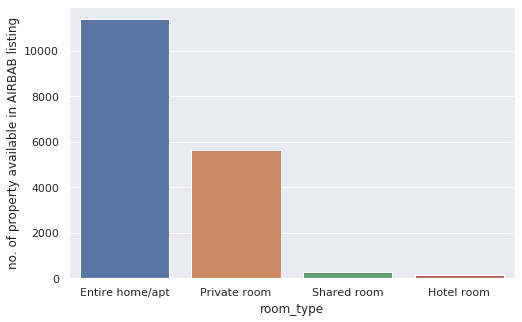

In [64]:
sns.set(rc={"figure.figsize":(8, 5)}) 
sns.barplot(data = df_1,x = 'room_type',y = 'no. of property available in AIRBAB listing')

In [18]:
df = df.dropna(axis=1)

In [19]:
df.dtypes

id                                  int64
host_id                             int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [23]:
df

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,9835,33057,Manningham,-37.772680,145.092130,Private room,60,1,4,1,365,0
1,12936,50121,Port Phillip,-37.859990,144.976620,Entire home/apt,95,3,42,10,0,0
2,33111,143550,Melbourne,-37.819970,144.968340,Private room,1000,1,2,1,265,0
3,38271,164193,Casey,-38.057250,145.339360,Entire home/apt,110,1,171,1,313,18
4,41836,182833,Darebin,-37.697290,145.000820,Private room,40,7,159,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17404,54182988,343442154,Melbourne,-37.816151,144.971115,Entire home/apt,99,1,0,84,349,0
17405,54184189,53095694,Yarra,-37.806796,144.999509,Entire home/apt,127,2,0,1,28,0
17406,54184673,31552872,Melbourne,-37.815350,144.962902,Entire home/apt,109,2,0,2,337,0
17407,54187294,31337479,Melbourne,-37.800870,144.963260,Entire home/apt,99,1,0,1,365,0


In [21]:
df1= pd.read_csv('reviews.csv')

In [26]:
df1.head()

,listing_id,date
0,9835,2011-05-24
1,9835,2013-02-26
2,9835,2014-12-08
3,9835,2015-09-12
4,12936,2010-08-04


In [27]:
df1.describe(include = "all")

,listing_id,date
count,4.691480e+05,469148
unique,NaN,3637
top,NaN,2020-01-26
freq,NaN,921
mean,1.973445e+07,NaN
std,1.263065e+07,NaN
min,9.835000e+03,NaN
25%,9.827746e+06,NaN
50%,1.807793e+07,NaN
75%,2.788036e+07,NaN


In [29]:
df1.isnull().sum().sort_values(ascending=False)

date          0
listing_id    0
dtype: int64

In [30]:
df1

,listing_id,date
0,9835,2011-05-24
1,9835,2013-02-26
2,9835,2014-12-08
3,9835,2015-09-12
4,12936,2010-08-04
...,...,...
469143,54057824,2022-01-03
469144,54058433,2022-01-06
469145,54061080,2022-01-03
469146,54084101,2022-01-04


In [31]:
df1.columns = df1.columns.str.replace('listing_id', 'id')

In [32]:
df_joined=df.merge(df1,on='id')
df_joined

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,date
0,9835,33057,Manningham,-37.772680,145.092130,Private room,60,1,4,1,365,0,2011-05-24
1,9835,33057,Manningham,-37.772680,145.092130,Private room,60,1,4,1,365,0,2013-02-26
2,9835,33057,Manningham,-37.772680,145.092130,Private room,60,1,4,1,365,0,2014-12-08
3,9835,33057,Manningham,-37.772680,145.092130,Private room,60,1,4,1,365,0,2015-09-12
4,12936,50121,Port Phillip,-37.859990,144.976620,Entire home/apt,95,3,42,10,0,0,2010-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469143,54057824,438093729,Brimbank,-37.750600,144.802200,Shared room,80,1,1,1,365,1,2022-01-03
469144,54058433,438112924,Yarra Ranges,-37.686420,145.536250,Entire home/apt,290,1,1,1,354,1,2022-01-06
469145,54061080,343442154,Melbourne,-37.808826,144.959549,Entire home/apt,134,1,1,84,139,1,2022-01-03
469146,54084101,96873605,Whitehorse,-37.813510,145.177060,Entire home/apt,144,1,1,1,40,1,2022-01-04


# Perspectives  of AIRBNB data study:

## Assuming stakeholder is a prospective AIRBNB host,and the analysis will trying to find if it is good time to be a AIRBAB host and how to make money from being a host
### 1. How the AIRBAB market looks like in above data period? What is the profitability of this market?
### 2. How many beds can AIRBAB market offer in a certain period?
### 3. What is the most popular room type and why?
### 4. Any relationship between neighbourhood(geographically) and price?
### 5. what is the number of listings in each neighbourhood,median listing price and in each room type?
### 6. What would measure a sucessful AIRBAB host?

In [78]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77268,145.09213,Private room,60,1,4,2015-09-12,0.03,1,365,0,NaN
1,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.85999,144.97662,Entire home/apt,95,3,42,2020-03-15,0.30,10,0,0,NaN
2,33111,Million Dollar Views Over Melbourne,143550,Paul,NaN,Melbourne,-37.81997,144.96834,Private room,1000,1,2,2012-01-27,0.02,1,265,0,NaN
3,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.05725,145.33936,Entire home/apt,110,1,171,2021-12-16,1.26,1,313,18,NaN
4,41836,CLOSE TO CITY & MELBOURNE AIRPORT,182833,Diana,NaN,Darebin,-37.69729,145.00082,Private room,40,7,159,2018-08-22,1.17,2,0,0,NaN


In [79]:
df_E=df[df['room_type'].str.contains('Entire')]
df_E

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.859990,144.976620,Entire home/apt,95,3,42,2020-03-15,0.30,10,0,0,NaN
3,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.057250,145.339360,Entire home/apt,110,1,171,2021-12-16,1.26,1,313,18,NaN
5,43429,Tranquil Javanese-Style Apartment in Oakleigh ...,189684,Allan,NaN,Monash,-37.899600,145.114470,Entire home/apt,99,2,218,2021-12-21,1.61,2,308,8,NaN
7,51592,Central City Warehouse Apartment,190879,Michelle,NaN,Melbourne,-37.814860,144.962670,Entire home/apt,228,2,314,2021-12-27,2.37,1,299,49,NaN
8,66754,Richmond CITY EDGE 60s COOL 1BR+WIFI+AC,50121,The A2C Team,NaN,Yarra,-37.821270,144.994080,Entire home/apt,94,3,70,2020-03-14,0.53,10,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17404,54182988,A Cozy & Central 2BR Apt Near Federation Square,343442154,Advante Homes,NaN,Melbourne,-37.816151,144.971115,Entire home/apt,99,1,0,NaN,NaN,84,349,0,NaN
17405,54184189,Stylish Abbotsford loft,53095694,Simon,NaN,Yarra,-37.806796,144.999509,Entire home/apt,127,2,0,NaN,NaN,1,28,0,NaN
17406,54184673,Stylish Apartment in Historic Building,31552872,Narelle,NaN,Melbourne,-37.815350,144.962902,Entire home/apt,109,2,0,NaN,NaN,2,337,0,NaN
17407,54187294,Lovely spacious 1 bedroom apartment in Carlton,31337479,Cynthia,NaN,Melbourne,-37.800870,144.963260,Entire home/apt,99,1,0,NaN,NaN,1,365,0,NaN


In [82]:
df_E.describe(include = "all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.137000e+04,11369,1.137000e+04,11369,0.0,11370,11370.000000,11370.000000,11370,11370.000000,11370.000000,11370.000000,9442,9442.000000,11370.000000,11370.000000,11370.000000,0.0
unique,NaN,11103,NaN,3091,NaN,30,NaN,NaN,1,NaN,NaN,NaN,1577,NaN,NaN,NaN,NaN,NaN
top,NaN,Royal Stays|Near Casino|Wifi|Kitchen|Laundry|P...,NaN,MadeComfy,NaN,Melbourne,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-01-01,NaN,NaN,NaN,NaN,NaN
freq,NaN,23,NaN,123,NaN,3799,NaN,NaN,11370,NaN,NaN,NaN,324,NaN,NaN,NaN,NaN,NaN
mean,3.044920e+07,NaN,1.136051e+08,NaN,NaN,NaN,-37.826532,145.020422,NaN,234.956552,7.532366,34.156201,NaN,1.162411,10.056992,140.128672,6.687335,NaN
std,1.564704e+07,NaN,1.159361e+08,NaN,NaN,NaN,0.068278,0.149767,NaN,401.752094,33.545228,60.141511,NaN,1.413613,21.258639,141.333418,13.110743,NaN
min,1.293600e+04,NaN,1.878500e+04,NaN,NaN,NaN,-38.222470,144.518670,NaN,21.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.765653e+07,NaN,2.095652e+07,NaN,NaN,NaN,-37.850970,144.958630,NaN,113.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000,0.000000,NaN
50%,3.091140e+07,NaN,6.220735e+07,NaN,NaN,NaN,-37.819530,144.978700,NaN,155.000000,2.000000,9.000000,NaN,0.740000,1.000000,87.000000,1.000000,NaN
75%,4.354455e+07,NaN,1.778704e+08,NaN,NaN,NaN,-37.805253,145.009482,NaN,245.000000,4.000000,41.000000,NaN,1.630000,7.000000,302.750000,8.000000,NaN


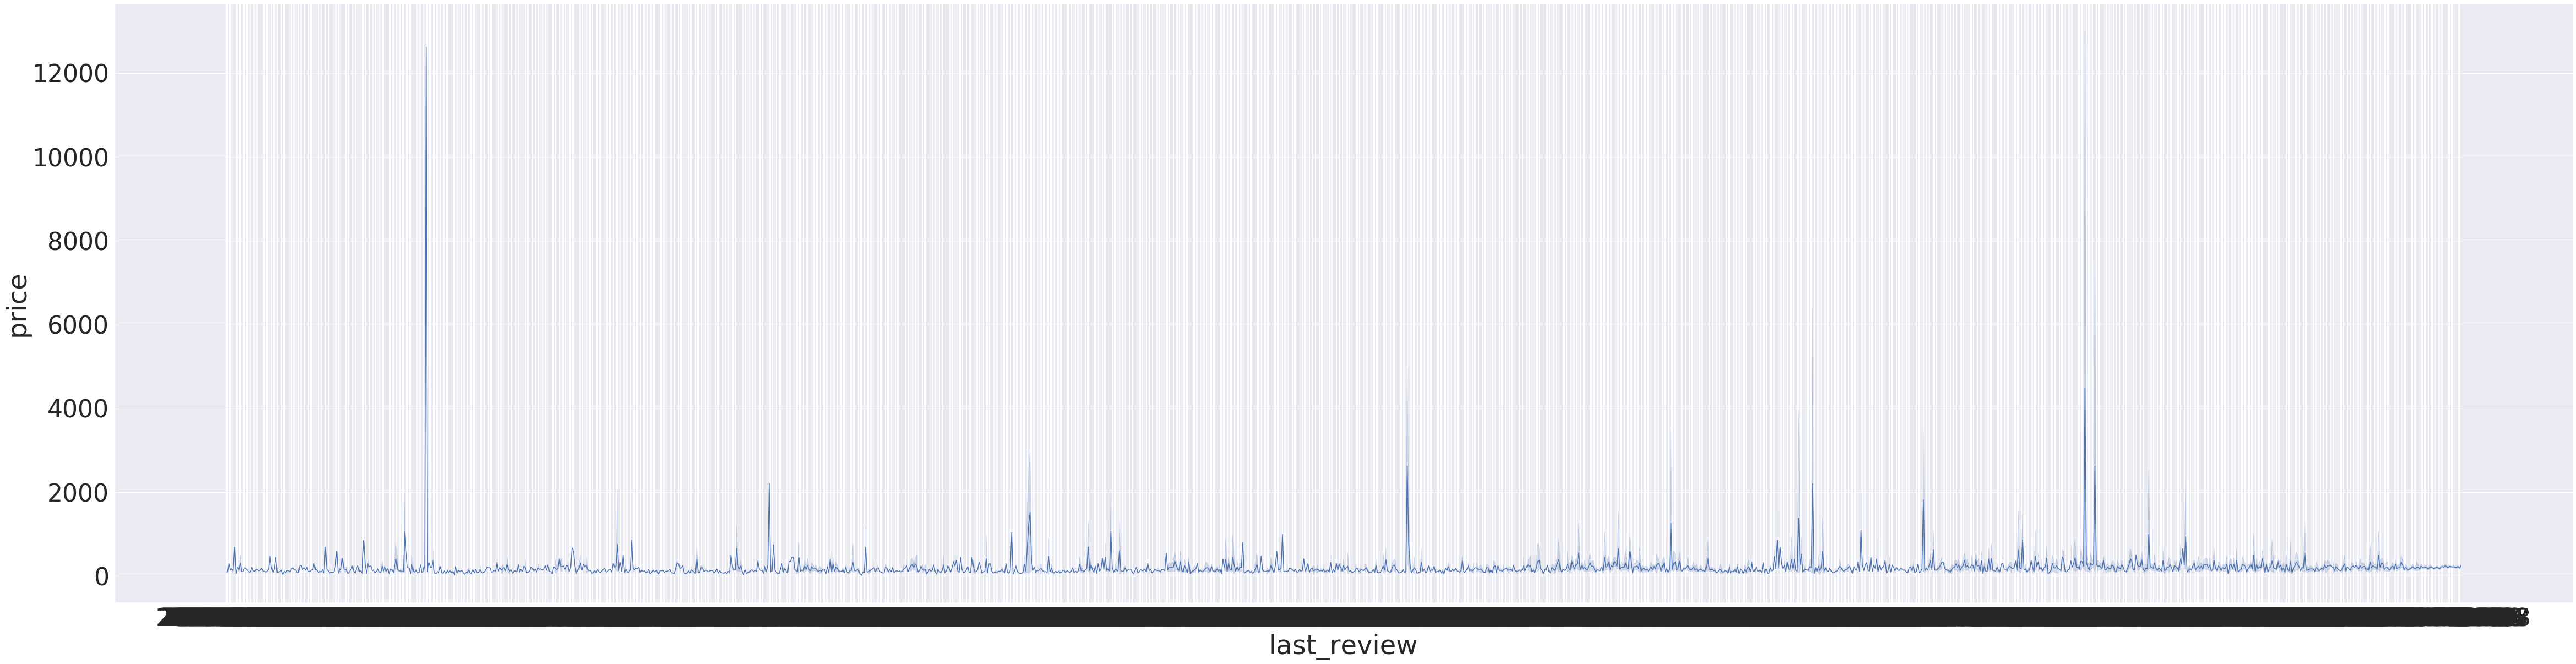

In [80]:
sns.set(rc={"figure.figsize":(80, 20)}) 
sns.set(font_scale=4)
sns.lineplot(x='last_review', y='price',data=df_E)

In [89]:
df_E1=df_E.groupby(["neighbourhood"])["number_of_reviews"].sum().reset_index()
df_E1=df_E1.sort_values(by='number_of_reviews', ascending=False)
df_E1.head()

,neighbourhood,number_of_reviews
17,Melbourne,143509
23,Port Phillip,46047
29,Yarra Ranges,42989
28,Yarra,37807
24,Stonnington,24751


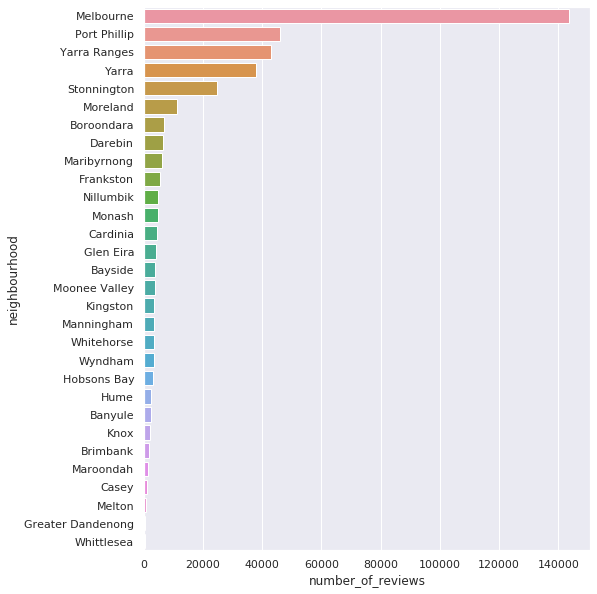

In [91]:
sns.set(rc={"figure.figsize":(8, 10)}) 
sns.barplot(data = df_E1,x = 'number_of_reviews',y = 'neighbourhood')

In [102]:
df_E2=df_E.groupby(["neighbourhood"])["price"].median().reset_index()
df_E2=df_E2.sort_values(by='price', ascending=False)
df_E2

,neighbourhood,price
29,Yarra Ranges,270.0
1,Bayside,250.0
4,Cardinia,213.5
12,Kingston,207.0
18,Melton,206.0
26,Whittlesea,199.0
7,Frankston,198.0
5,Casey,195.0
27,Wyndham,192.0
22,Nillumbik,190.0


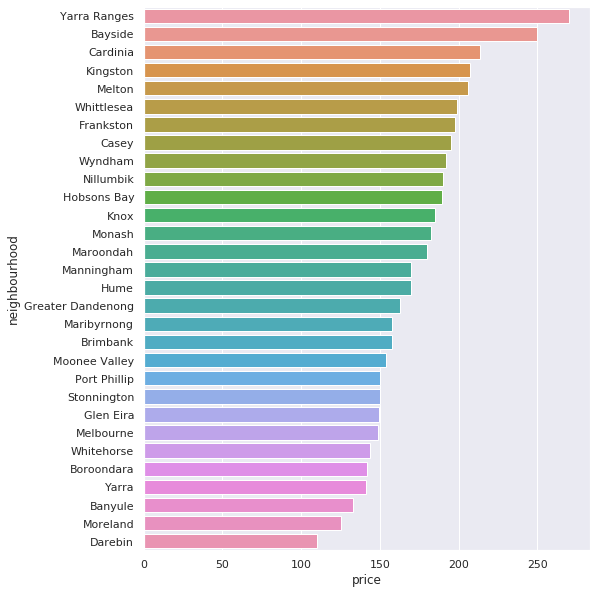

In [104]:
sns.set(rc={"figure.figsize":(8, 10)}) 
sns.barplot(data = df_E2,x = 'price',y = 'neighbourhood')

In [ ]:
df_region=df_region.sort_values(by='Price in M', ascending=False)

In [81]:
df_P=df[df['room_type'].str.contains('Private')]
df_P

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77268,145.09213,Private room,60,1,4,2015-09-12,0.03,1,365,0,NaN
2,33111,Million Dollar Views Over Melbourne,143550,Paul,NaN,Melbourne,-37.81997,144.96834,Private room,1000,1,2,2012-01-27,0.02,1,265,0,NaN
4,41836,CLOSE TO CITY & MELBOURNE AIRPORT,182833,Diana,NaN,Darebin,-37.69729,145.00082,Private room,40,7,159,2018-08-22,1.17,2,0,0,NaN
6,44082,Queen Room in Beautiful House,193031,Vicki,NaN,Frankston,-38.14932,145.14157,Private room,79,7,52,2021-08-25,0.39,6,145,1,NaN
9,67211,"Kew Tranquility, Melbourne",326880,Kate,NaN,Boroondara,-37.80370,145.03396,Private room,45,2,176,2021-05-12,1.33,1,357,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17390,54150118,Delightful 1 bedroom bunkbeds with ensuit,16401706,Roger,NaN,Bayside,-37.89888,145.00494,Private room,96,1,0,NaN,NaN,2,365,0,NaN
17392,54151162,"Large & Sunny Room in Brunswick! A/C,Queen Bed,TV",90729398,Valeria,NaN,Moreland,-37.77303,144.97598,Private room,30,1,0,NaN,NaN,152,337,0,NaN
17393,54151460,Bright Room with Treetop Outlook in Cosy Apart...,9487209,Matthew,NaN,Melbourne,-37.79464,144.94378,Private room,68,1,0,NaN,NaN,1,2,0,NaN
17395,54163799,king size room in a share house,341566552,James,NaN,Stonnington,-37.89149,145.08606,Private room,48,1,0,NaN,NaN,2,90,0,NaN


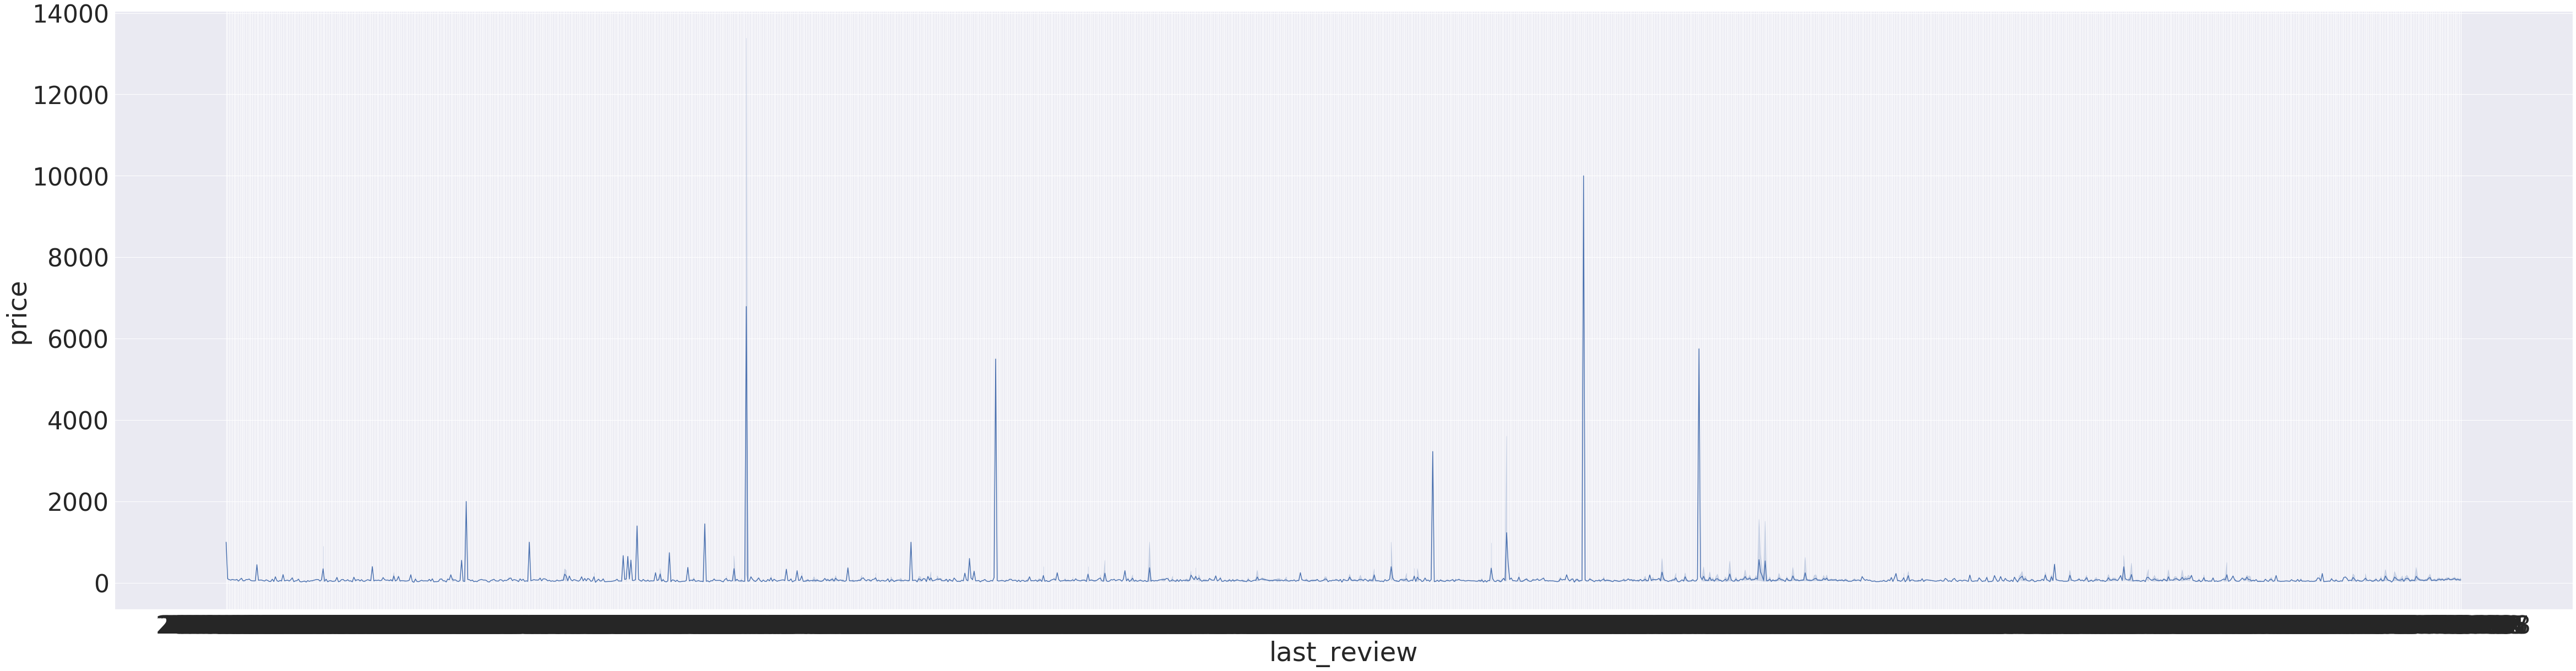

In [83]:
sns.set(rc={"figure.figsize":(80, 20)}) 
sns.set(font_scale=4)
sns.lineplot(x='last_review', y='price',data=df_P)

In [92]:
df_P1=df_P.groupby(["neighbourhood"])["number_of_reviews"].sum().reset_index()
df_P1=df_P1.sort_values(by='number_of_reviews', ascending=False)
df_P1.head()

,neighbourhood,number_of_reviews
17,Melbourne,17527
28,Yarra,7767
23,Port Phillip,6122
24,Stonnington,4361
21,Moreland,4203


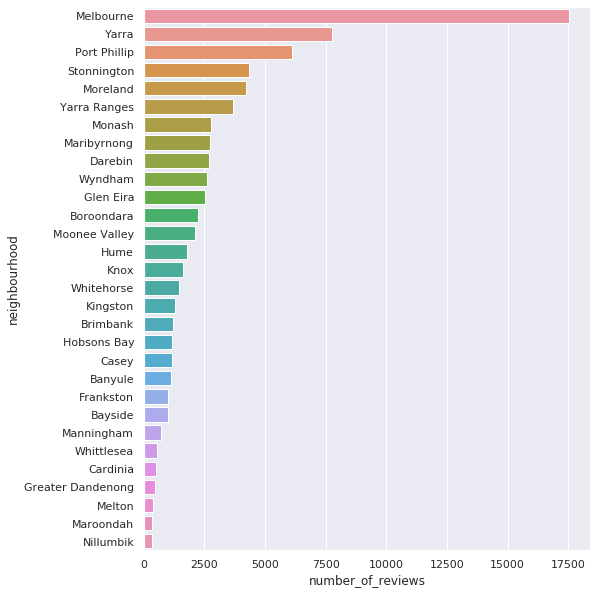

In [93]:
sns.set(rc={"figure.figsize":(8, 10)}) 
sns.barplot(data = df_P1,x = 'number_of_reviews',y = 'neighbourhood')

In [106]:
df_P2=df_P.groupby(["neighbourhood"])["price"].median().reset_index()
df_P2=df_P2.sort_values(by='price', ascending=False)
df_P2

,neighbourhood,price
29,Yarra Ranges,154.0
22,Nillumbik,100.0
4,Cardinia,90.0
1,Bayside,85.0
23,Port Phillip,74.0
5,Casey,70.0
2,Boroondara,69.0
17,Melbourne,69.0
10,Hobsons Bay,65.5
28,Yarra,65.0


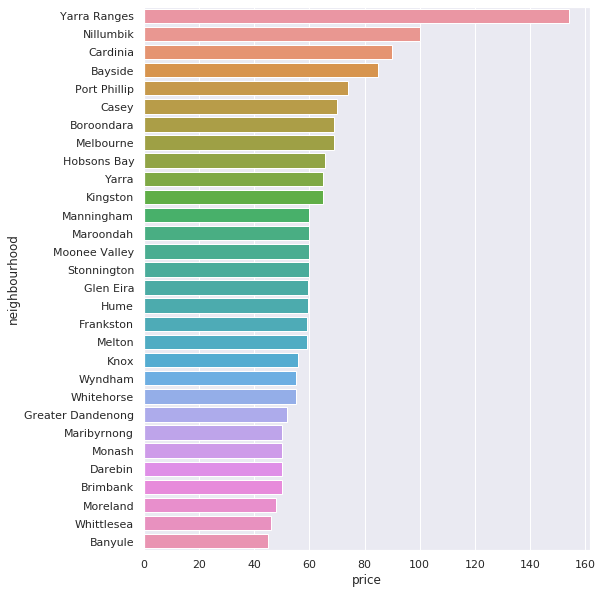

In [107]:
sns.set(rc={"figure.figsize":(8, 10)}) 
sns.barplot(data = df_P2,x = 'price',y = 'neighbourhood')

In [84]:
df_S=df[df['room_type'].str.contains('Shared')]
df_S

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
63,386252,"Room for rent, townhouse in Kew",381584,F,NaN,Boroondara,-37.80883,145.03969,Shared room,100,30,0,NaN,NaN,1,365,0,NaN
116,671981,Sofabed in Yarraville - nice sub,3395313,Tyler,NaN,Maribyrnong,-37.81555,144.88717,Shared room,100,1,0,NaN,NaN,1,365,0,NaN
264,1602671,"Local Laneway Living - stay with me Wifi, net...",8523310,Penny,NaN,Melbourne,-37.81600,144.95657,Shared room,51,2,74,2020-01-20,0.75,3,0,0,NaN
561,3194833,109Clarendontst southbank Melbourne,1424387,Patrik,NaN,Port Phillip,-37.82863,144.95958,Shared room,24,1,1,2014-08-09,0.01,1,0,0,NaN
1225,6249505,近墨大RMIT CITY超便宜,32454831,Cici,NaN,Moreland,-37.75069,144.96765,Shared room,160,1,0,NaN,NaN,1,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15569,49693984,Warm and welcoming with modern twist.,54565099,Carole,NaN,Banyule,-37.73733,145.07794,Shared room,75,2,0,NaN,NaN,1,88,0,NaN
15691,50096848,Cheerful clean share room in inner city,400209550,Mia,NaN,Maribyrnong,-37.80183,144.86285,Shared room,21,28,0,NaN,NaN,4,283,0,NaN
16032,51097341,Luxe high-rise one bed apartment for share in ...,14413771,John,NaN,Melbourne,-37.80970,144.96763,Shared room,100,1,0,NaN,NaN,1,365,0,NaN
17328,54057824,Cheerful Holiday home in St Albans,438093729,Alex,NaN,Brimbank,-37.75060,144.80220,Shared room,80,1,1,2022-01-03,1.00,1,365,1,NaN


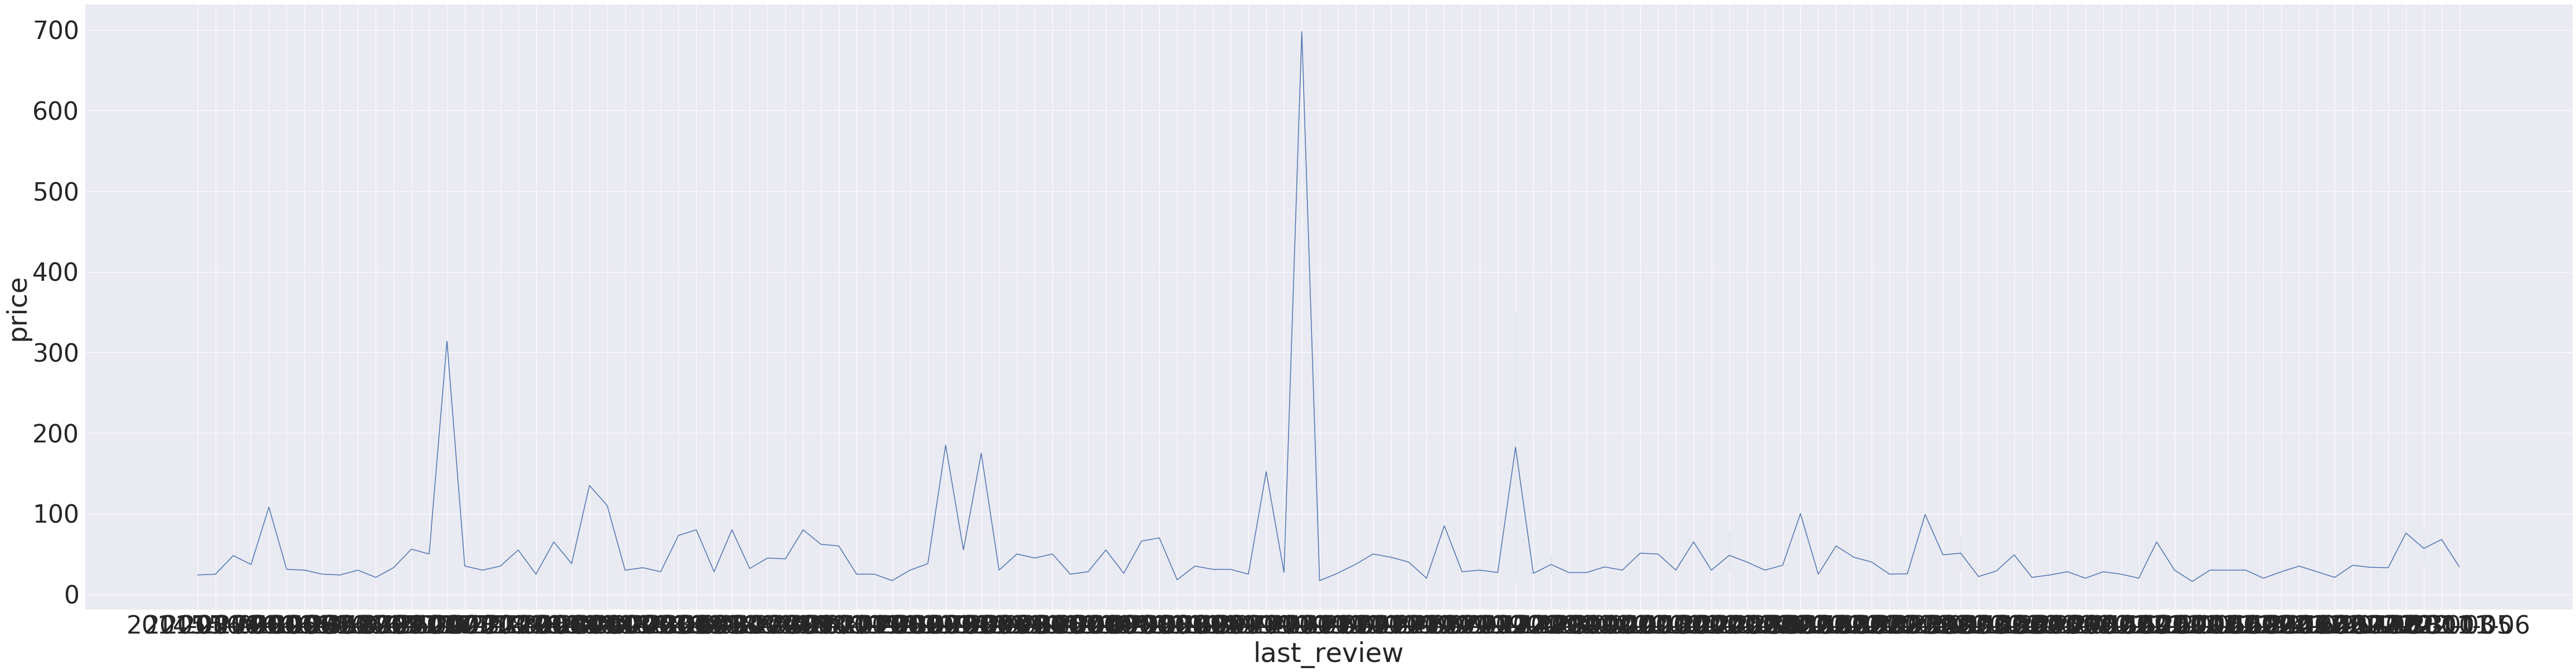

In [85]:
sns.set(rc={"figure.figsize":(80, 20)}) 
sns.set(font_scale=4)
sns.lineplot(x='last_review', y='price',data=df_S)

In [94]:
df_S1=df_P.groupby(["neighbourhood"])["number_of_reviews"].sum().reset_index()
df_S1=df_P1.sort_values(by='number_of_reviews', ascending=False)
df_S1.head()

,neighbourhood,number_of_reviews
17,Melbourne,17527
28,Yarra,7767
23,Port Phillip,6122
24,Stonnington,4361
21,Moreland,4203


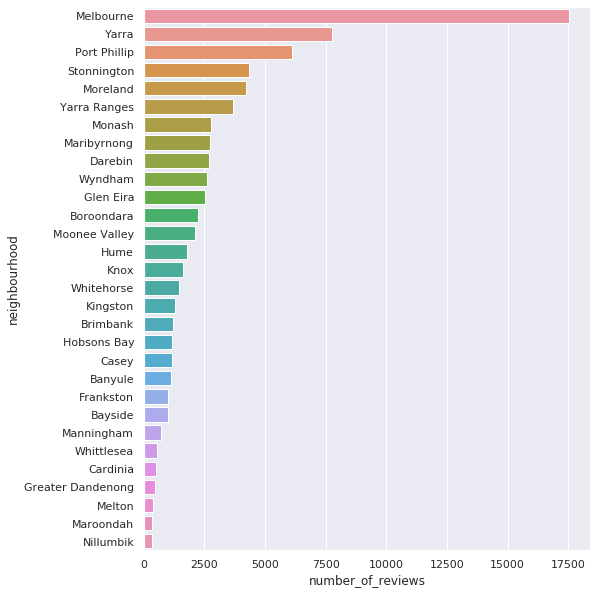

In [95]:
sns.set(rc={"figure.figsize":(8, 10)}) 
sns.barplot(data = df_S1,x = 'number_of_reviews',y = 'neighbourhood')

In [108]:
df_S2=df_S.groupby(["neighbourhood"])["price"].median().reset_index()
df_S2=df_S2.sort_values(by='price', ascending=False)
df_S2

,neighbourhood,price
11,Manningham,342.5
13,Maroondah,122.0
9,Kingston,117.5
3,Brimbank,113.5
1,Bayside,82.5
7,Hobsons Bay,81.0
0,Banyule,75.0
2,Boroondara,68.0
8,Hume,66.0
15,Monash,55.0


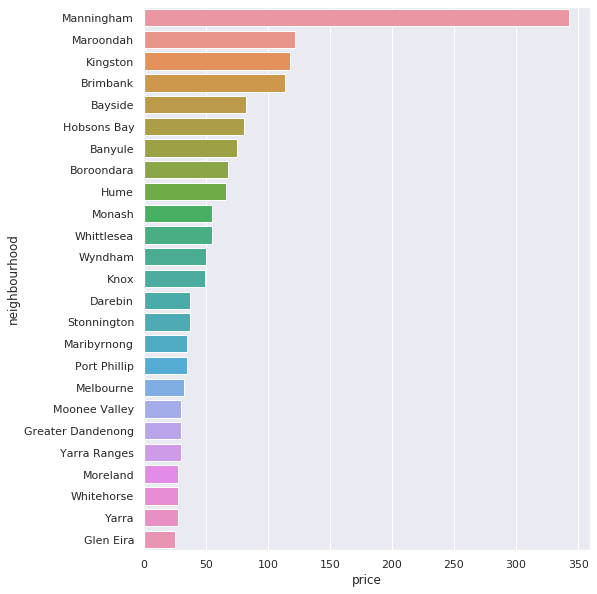

In [109]:
sns.set(rc={"figure.figsize":(8, 10)}) 
sns.barplot(data = df_S2,x = 'price',y = 'neighbourhood')

In [86]:
df_H=df[df['room_type'].str.contains('Hotel')]
df_H

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
586,3363756,ACD Apartments - Executive One Bedroom Apartments,16970146,ACD Apartments,NaN,Melbourne,-37.81367,144.94148,Hotel room,222,30,3,2021-10-17,0.13,6,351,2,NaN
749,4327686,Treetops Guesthouse at Lochiel,22136034,Alan,NaN,Yarra Ranges,-37.85401,145.36474,Hotel room,348,1,3,2018-12-31,0.04,5,337,0,NaN
1989,9465627,Grevillea Rise,37539839,Gae And Mandi,NaN,Yarra Ranges,-37.73223,145.44013,Hotel room,450,2,97,2022-01-05,1.31,1,343,21,NaN
2377,10557322,Olinda Country Cottages garden view spa cottage 1,53007615,Kathy,NaN,Yarra Ranges,-37.84902,145.36112,Hotel room,270,2,1,2021-12-14,1.00,3,363,1,NaN
3639,15196327,Room with individual entrance & ensuite bathroom,43308118,Steve,NaN,Monash,-37.90235,145.15994,Hotel room,157,1,20,2021-12-24,0.32,1,127,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,38883439,Two Bedroom Townhouse,296379242,Quest Sanctuary,NaN,Wyndham,-37.89377,144.76541,Hotel room,269,1,0,NaN,NaN,2,336,0,NaN
11576,39032562,Ringwood Royale - Deluxe One Bedroom Apartment,298206690,Mocita,NaN,Maroondah,-37.81356,145.23105,Hotel room,278,1,0,NaN,NaN,2,42,0,NaN
11578,39033184,Ringwood Royale - Executive Two Bedroom Apartment,298206690,Mocita,NaN,Maroondah,-37.81402,145.23064,Hotel room,288,1,2,2021-04-30,0.15,2,41,1,NaN
11679,39233254,Quest Burwood East - 1 Bedroom Apartment,261449803,Quest Burwood East,NaN,Whitehorse,-37.85142,145.12220,Hotel room,206,1,6,2021-12-10,0.48,2,354,5,NaN


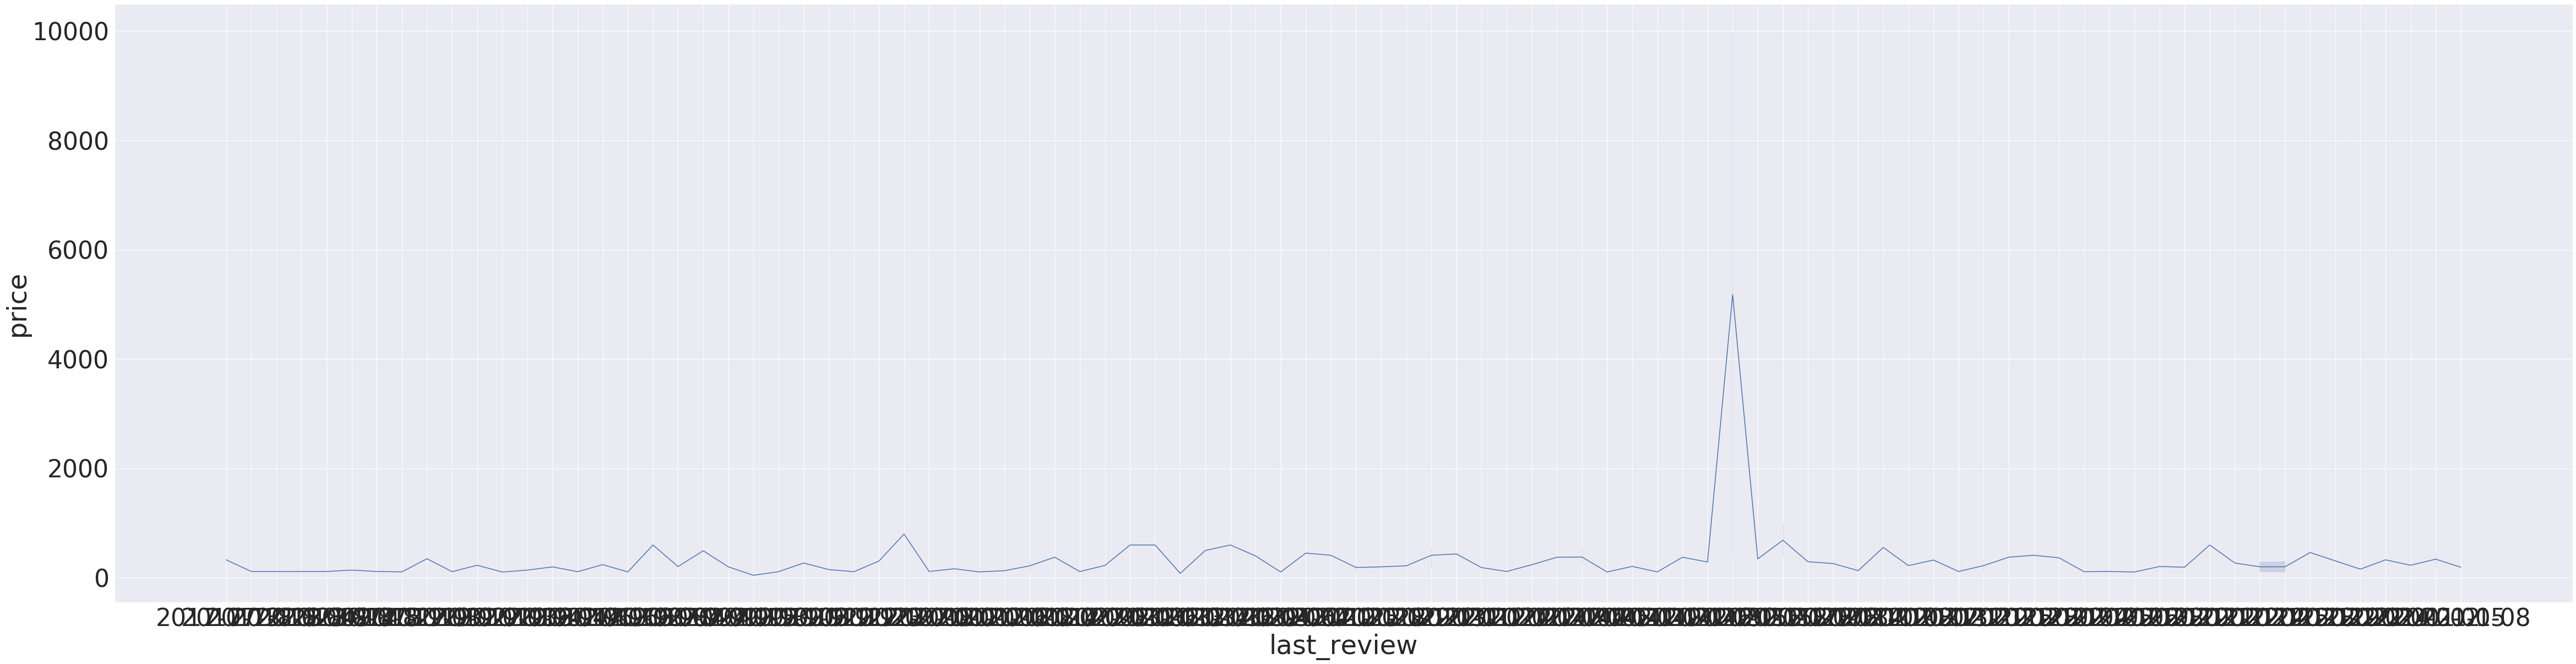

In [87]:
sns.set(rc={"figure.figsize":(80, 20)}) 
sns.set(font_scale=4)
sns.lineplot(x='last_review', y='price',data=df_H)

In [96]:
df_H1=df_H.groupby(["neighbourhood"])["number_of_reviews"].sum().reset_index()
df_H1=df_H1.sort_values(by='number_of_reviews', ascending=False)
df_H1.head()

,neighbourhood,number_of_reviews
4,Melbourne,1019
7,Port Phillip,411
6,Moreland,407
11,Yarra Ranges,179
5,Monash,26


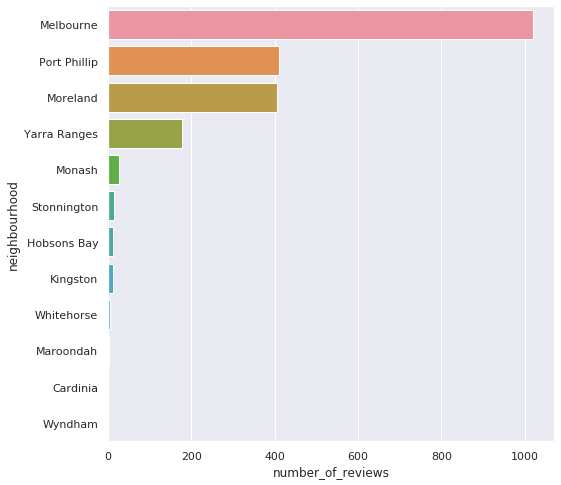

In [98]:
sns.set(rc={"figure.figsize":(8, 8)}) 
sns.barplot(data = df_H1,x = 'number_of_reviews',y = 'neighbourhood')

In [110]:
df_H2=df_H.groupby(["neighbourhood"])["price"].median().reset_index()
df_H2=df_H2.sort_values(by='price', ascending=False)
df_H2

,neighbourhood,price
6,Moreland,599
2,Kingston,501
11,Yarra Ranges,330
3,Maroondah,283
7,Port Phillip,250
10,Wyndham,234
9,Whitehorse,206
1,Hobsons Bay,203
0,Cardinia,200
4,Melbourne,115


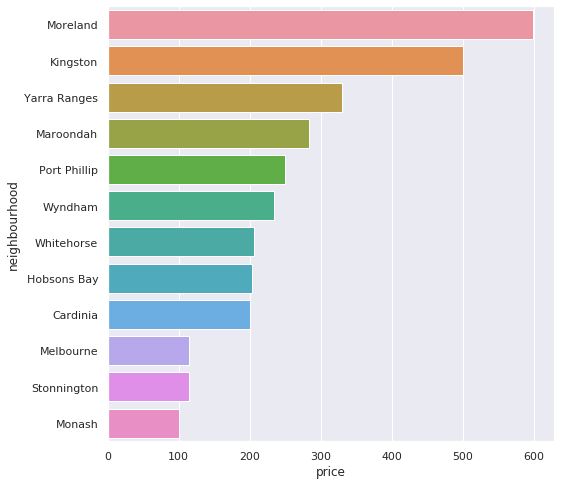

In [111]:
sns.set(rc={"figure.figsize":(8, 8)}) 
sns.barplot(data = df_H2,x = 'price',y = 'neighbourhood')